In [1]:
import numpy as np
import pandas as pd 
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

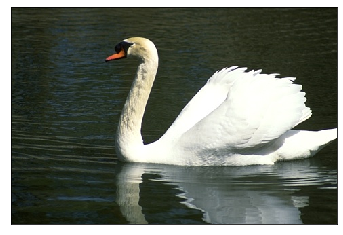

In [2]:
# img=cv.imread('189080.jpg')
img=cv.imread('8068.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img) 
plt.xticks([])
plt.yticks([])
plt.grid(False)

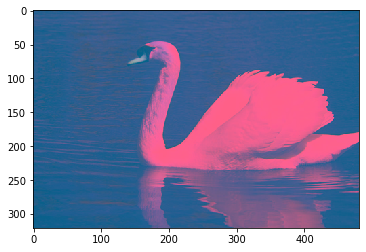

In [3]:
pic=cv.cvtColor(img,cv.COLOR_RGB2LUV)
plt.imshow(pic) 

In [4]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(154401, 3)

In [5]:
import time as t
timearray=[]
segementedImg=[]

In [6]:
clusterssize = [2,3,4,5,6,7,8,9,10]
error=[]

In [7]:
for i in clusterssize:
    start=t.time()
    kmeans = KMeans(n_clusters=i, random_state=0).fit(pic_n)
    timearray.append(t.time()-start)
    segementedImg.append(kmeans.labels_)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
    error.append(np.linalg.norm(pic-cluster_pic))
    print(i)

2
3
4
5
6
7
8
9
10


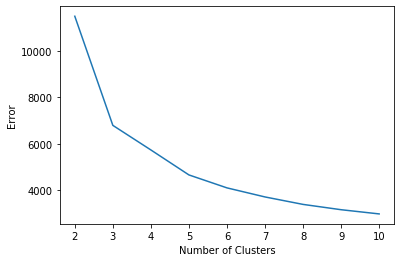

In [8]:
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.plot(clusterssize,error)

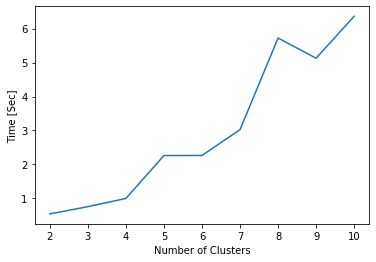

In [9]:
plt.xlabel('Number of Clusters')
plt.ylabel('Time [Sec]')

plt.plot(np.arange(2,11,1),timearray)
np.savetxt("kmeans_timearray.csv", timearray, delimiter=",")
np.savetxt("kmeans_segementedImg.csv", segementedImg, delimiter=",")

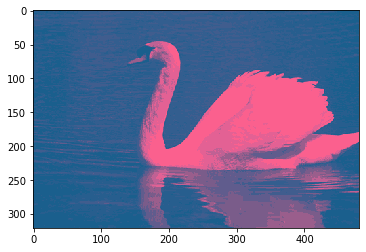

In [10]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1],3)
plt.imshow(cluster_pic/255,cmap='gray')

In [11]:
error

[11483.985752766219,
 6790.405584151348,
 5732.617660658961,
 4658.363000690662,
 4101.48716336559,
 3711.288883367736,
 3390.7633733925977,
 3162.287408706774,
 2981.5523843124543]

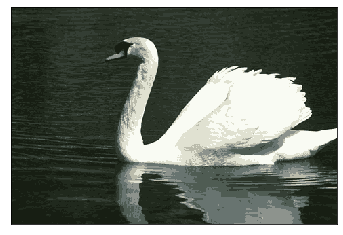

In [12]:
temp=cluster_pic.copy()
temp= cv.cvtColor((temp).astype('uint8'),cv.COLOR_LUV2RGB)
plt.xticks([])
plt.yticks([])
plt.imshow(temp)
plt.savefig('kmeans_SegementdIMg.jpg')
plt.show()